In [1]:
%matplotlib inline

In [2]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sys import stdout
from copy import deepcopy
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


/home/younesz/.conda/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
from os import chdir
chdir('/home/younesz/Documents/Code/Python')
from Utils.scraping.convert_raw import get_player_names
from Utils.programming.ut_find_folders import *
from Utils.maths.ut_cumsum_thresh import *

In [4]:
# First get the data from disk
with open('ReinforcementLearning/NHL/playerstats/offVSdef/Automatic_classification/trainingData_4notebook.p', 'rb') as f:
    DT = pickle.load(f)
annInput = DT['X']
annTarget = DT['Y']

In [5]:
# --- BUILD ANN

In [6]:
# Input
inpSize     =   np.shape(annInput)[1]
annLay      =   [10,5]
# Architecture - 1 layer
annX        =   tf.placeholder(tf.float32, [None, inpSize], name='Input_to_the_network-player_features')
annY_       =   tf.placeholder(tf.float32, [None, 2], name='Ground_truth')
annW1       =   tf.Variable( tf.truncated_normal([inpSize, annLay[0]], stddev=0.1) )
annB1       =   tf.Variable( tf.ones([1, annLay[0]])/10 )
Y1          =   tf.nn.relu( tf.matmul( annX, annW1 ) + annB1 )
annW2       =   tf.Variable( tf.truncated_normal([annLay[0], 2], stddev=0.1) )
annB2       =   tf.Variable( tf.ones([1, 2])/10 )
annY        =   tf.matmul( Y1, annW2 ) + annB2

In [7]:
# Init variables and functions
init        =   tf.global_variables_initializer()
# Optimization
loss        =   tf.reduce_mean(tf.squared_difference(annY_, annY))
train_step  =   tf.train.GradientDescentOptimizer(0.01).minimize(loss)
# Compute accuracy
is_correct  =   tf.equal( tf.argmax(annY, axis=1), tf.argmax(annY_, axis=1) )
accuracy    =   tf.reduce_mean( tf.cast(is_correct, tf.float32) )

In [8]:
# --- TEST THE MODEL

In [9]:
trLoss  =   []
tsLoss  =   []
trAcc   =   []
tsAcc   =   []
nIter   =   50
for iIt in range(nIter):
    # --- TRAIN ANN
    # Init instance
    sess        =   tf.Session()
    sess.run(init)
    # Split train/test data
    train_X, test_X, train_Y, test_Y    =   train_test_split(annInput, annTarget, test_size=0.25)
    batchSize   =   5
    # Loop on data splits
    fcnLoss     =   []
    # Make exponential batch size increase
    batchSize   =   []
    minSize     =   5
    maxSize     =   20
    nSteps      =   0
    while np.sum(batchSize)+maxSize<train_X.shape[0]:
        nSteps      +=  1
        batchSize   =   np.floor( ((np.exp(range(nSteps)) - 1)/(np.exp(nSteps)-1))**.05 * (maxSize - minSize) ) + minSize
    batchSize   =   np.append(batchSize, train_X.shape[0]-np.sum(batchSize)).astype(int)
    trL     =   []
    tsL     =   []
    trA     =   []
    tsA     =   []
    for ib in batchSize:
        # Slice input and target
        trInput, train_X    =   train_X[:ib,:], train_X[ib:,:]
        trTarget, train_Y   =   train_Y[:ib,:], train_Y[ib:,:]
        # Pass them through
        dictDT  =   {annX:trInput, annY_:trTarget}
        sess.run(annY, feed_dict=dictDT)
        sess.run(train_step, feed_dict=dictDT)
        trL.append(sess.run(loss, feed_dict=dictDT))
        trA.append( sess.run(accuracy, feed_dict=dictDT) )
        # Assess accuracy
        dictTS  =   {annX:test_X, annY_:test_Y}
        tsL.append( sess.run(loss, feed_dict=dictTS) )
        tsA.append(sess.run(accuracy, feed_dict=dictTS) )
    #plt.figure(); plt.plot(fcnLoss)
    trLoss.append(trL)
    tsLoss.append(tsL)
    trAcc.append(trA)
    tsAcc.append(tsA)

InternalError: Blas GEMM launch failed : a.shape=(5, 18), b.shape=(18, 10), m=5, n=10, k=18
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_arg_Input_to_the_network-player_features_0_1/_1, Variable/read)]]

Caused by op 'MatMul', defined at:
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 281, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 232, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 397, in execute_request
    user_expressions, allow_stdin)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-9942d9951714>", line 9, in <module>
    Y1          =   tf.nn.relu( tf.matmul( annX, annW1 ) + annB1 )
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 1844, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 1289, in _mat_mul
    transpose_b=transpose_b, name=name)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/younesz/.conda/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(5, 18), b.shape=(18, 10), m=5, n=10, k=18
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/gpu:0"](_arg_Input_to_the_network-player_features_0_1/_1, Variable/read)]]


(0.4, 1)

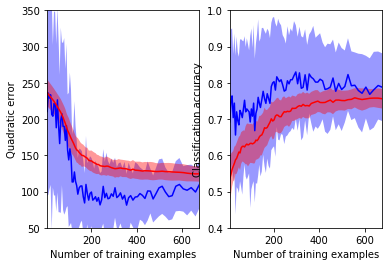

In [18]:
# --- Make plots
Fig     =   plt.figure()
Ax1     =   Fig.add_subplot(121)
Ax1.fill_between( np.cumsum(batchSize), np.mean(trLoss, axis=0)-np.std(trLoss, axis=0), np.mean(trLoss, axis=0)+np.std(trLoss, axis=0), facecolors='b', interpolate=True, alpha=0.4 )
Ax1.fill_between( np.cumsum(batchSize), np.mean(tsLoss, axis=0)-np.std(tsLoss, axis=0), np.mean(tsLoss, axis=0)+np.std(tsLoss, axis=0), facecolors='r', interpolate=True, alpha=0.4 )
Ax1.plot( np.cumsum(batchSize), np.mean(trLoss, axis=0), 'b')
Ax1.plot( np.cumsum(batchSize), np.mean(tsLoss, axis=0), 'r')
Ax1.set_xlabel('Number of training examples')
Ax1.set_ylabel('Quadratic error')
Ax1.set_xlim([min(batchSize), np.sum(batchSize)])
Ax1.set_ylim([50, 350])
Ax2     =   Fig.add_subplot(122)
Ax2.fill_between( np.cumsum(batchSize), np.mean(trAcc, axis=0)-np.std(trAcc, axis=0), np.mean(trAcc, axis=0)+np.std(trAcc, axis=0), facecolors='b', interpolate=True, alpha=0.4 )
Ax2.fill_between( np.cumsum(batchSize), np.mean(tsAcc, axis=0)-np.std(tsAcc, axis=0), np.mean(tsAcc, axis=0)+np.std(tsAcc, axis=0), facecolors='r', interpolate=True, alpha=0.4 )
Ax2.plot( np.cumsum(batchSize), np.mean(trAcc, axis=0), 'b')
Ax2.plot( np.cumsum(batchSize), np.mean(tsAcc, axis=0), 'r')
Ax2.set_xlabel('Number of training examples')
Ax2.set_ylabel('Classification accuracy')
Ax2.set_xlim([min(batchSize), np.sum(batchSize)])
Ax2.set_ylim([0.4, 1])